In [3]:
from pyspark import SparkContext, SparkConf

In [2]:
import datetime as datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [4]:
events = pd.read_csv('/home/nicolas/Descargas/spark-2.3.1-bin-hadoop2.7/events.csv')

/home/nicolas/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
events['timestamp'] =  pd.to_datetime(events['timestamp'])
events[['marca','modelo']] = events['model'].dropna().str.split(' ',n=1,expand=True)
events['weekday']=events['timestamp'].apply(lambda x: x.day_name())
events['hour']=events['timestamp'].dt.hour
events['month']=events['timestamp'].dt.month_name

# Estudiamos el contenido de los registros distribuidos a lo largo del tiempo:
### El rango temporal contenido en los registros ronda de: 2018-01-01 07:32:26 como fecha minima, y 2018-06-15 23:59:31 como fecha maxima.
### De aqui extraemos la siguiente informacion:

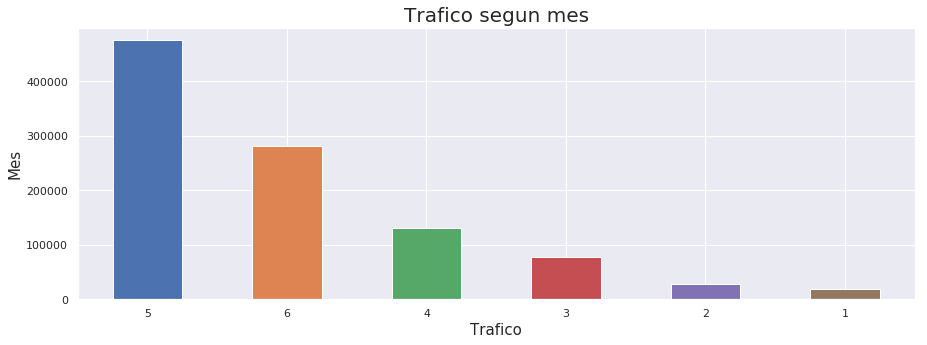

In [129]:
events['month'].value_counts().plot(kind='bar',rot=0, figsize=(15,5))
plt.title("Trafico segun mes", size=20)
plt.xlabel("Trafico",size=15)
plt.ylabel("Mes",size=15)
plt.show()

### Observamos que el volumen de trafico en la pagina web de Trocaphone pareciera ir incrementando con el tiempo. Tambien observamos que el mes con el mayor trafico resulta ser Mayo, pero teniendo en cuenta que se tienen datos hasta mitad de Junio, nos arriesgamos a suponer que de tener los datos del mes completo, se mantendria la tendencia de alza.

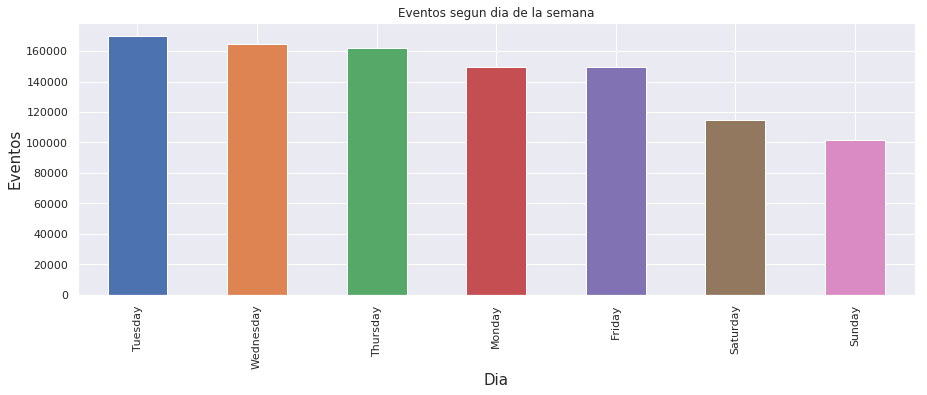

In [137]:
#Grafico Eventos segun dia de la semana
events.groupby('weekday')['event'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Eventos segun dia de la semana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Dia", size=15)
plt.show()

### Observamos que la pagina posee un menor trafico durante los fines de semana

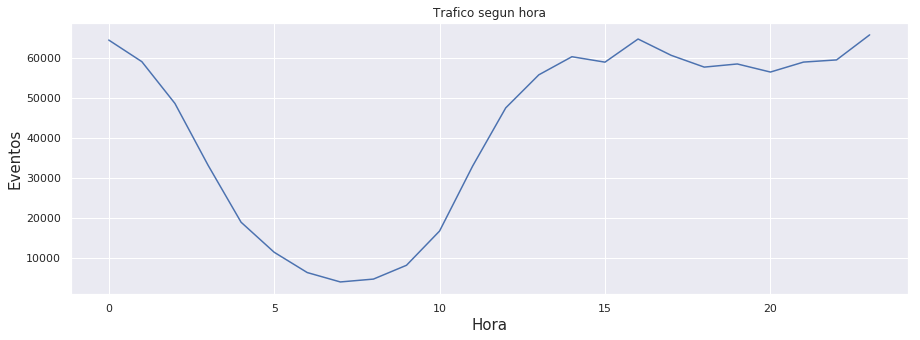

In [16]:
#Grafico Trafico Segun hora
events.groupby('hour')['hour'].count().plot(kind='line',figsize=(15,5))
plt.title('Trafico segun hora')
plt.ylabel("Eventos", size=15)
plt.xlabel("Hora", size=15)
plt.show()

### El analisis realizado cumple con lo esperado, que es un decremento en el trafico a partir de las 00:00 hs, y hasta las 07:00 hs, debido a que es el horario de descanso

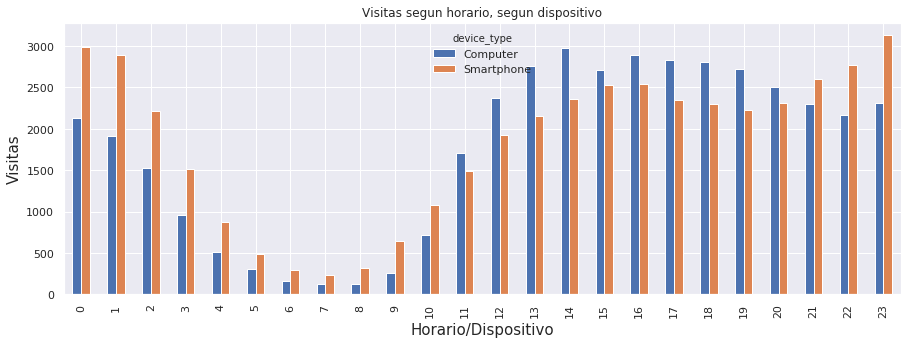

In [33]:
events.loc[(events['device_type']=='Computer')|(events['device_type']=='Smartphone')].groupby(['hour','device_type'])['hour'].count().unstack().plot(kind='bar',figsize=(15,5))
plt.title('Visitas segun horario, segun dispositivo')
plt.ylabel("Visitas", size=15)
plt.xlabel("Horario/Dispositivo", size=15)
plt.show()

### De aqui observamos que el trafico segun dispositivo varia, nuestra suposicion es que en la franja horaria donde el trafico de computadoras es mayor (11:00-20:00 hs) los usuarios se encuentran en sus lugares de trabajo, donde es normal el uso de computadoras, mientras que en el resto del dia, calificable como "tiempo de ocio" los usuarios prefieren acceder desde la comodidad de sus dispositivos moviles

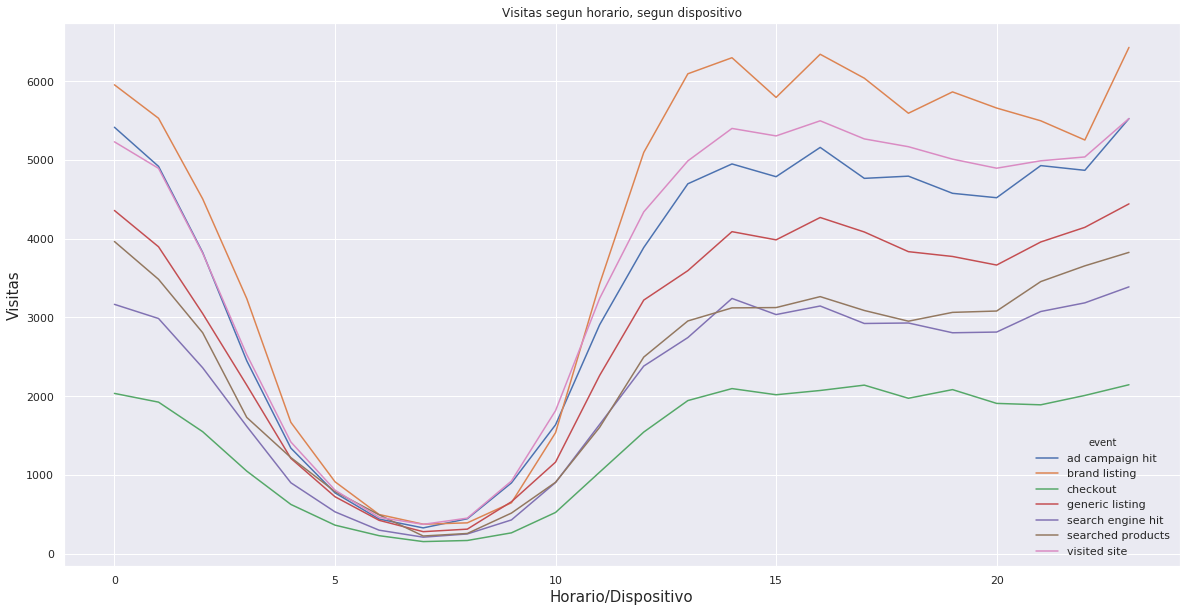

In [43]:
events.loc[(events['event']=='brand listing')|(events['event']=='visited site')|(events['event']=='ad campaign hit')|(events['event']=='generic listing')|(events['event']=='searched products')|(events['event']=='search engine hit')|(events['event']=='checkout')].groupby(['hour','event'])['hour'].count().unstack().plot(kind='line',figsize=(20,10))
plt.title('Visitas segun horario, segun dispositivo')
plt.ylabel("Visitas", size=15)
plt.xlabel("Horario/Dispositivo", size=15)
plt.show()

# Procedemos a realizar el analisis de las compras segun las caracteristicas del producto

# Compras/Visualizaciones segun Memoria

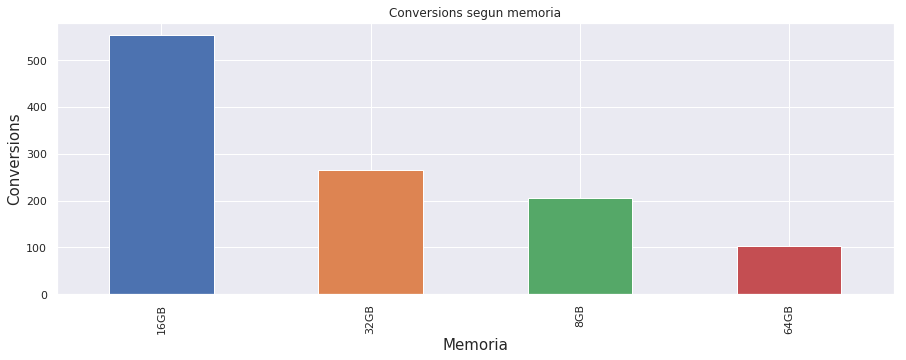

In [34]:
#GRAFICO MEMORIA SEGUN CONVERSION

events.loc[events['event']=='conversion']['storage'].value_counts().head(4).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun memoria')
plt.ylabel("Conversions", size=15)
plt.xlabel("Memoria", size=15)
plt.show()

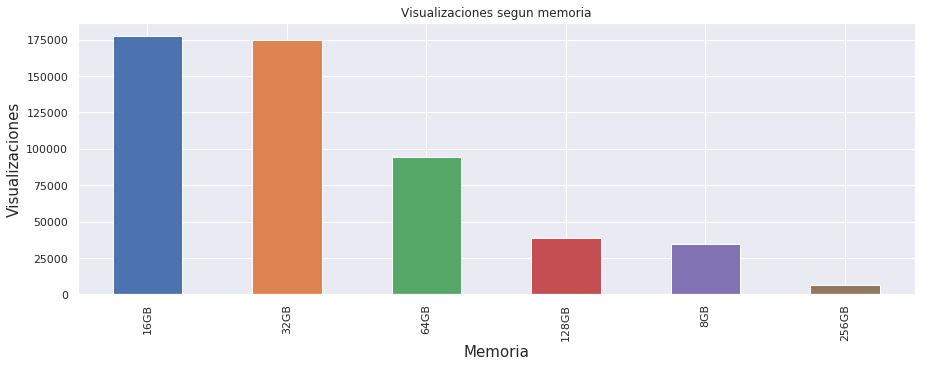

In [160]:
events.loc[events['event']=='viewed product']['storage'].value_counts().head(6).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun memoria')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Memoria", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Memoria

# Compras/Visualizaciones segun Color

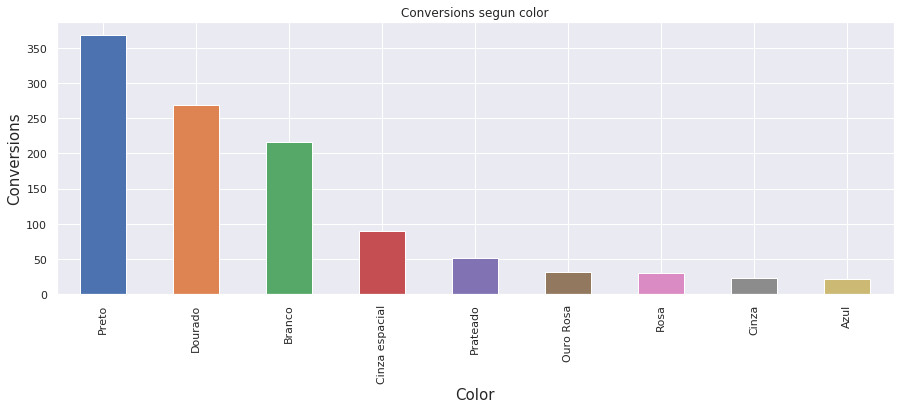

In [32]:
events.loc[events['event']=='conversion']['color'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun color')
plt.ylabel("Conversions", size=15)
plt.xlabel("Color", size=15)
plt.show()

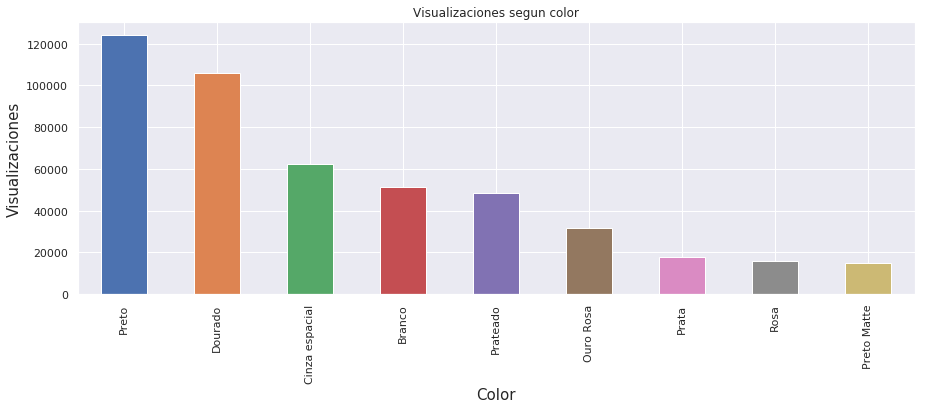

In [31]:
events.loc[events['event']=='viewed product']['color'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun color')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Color", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Color

# Compras/Visualizaciones segun Condicion

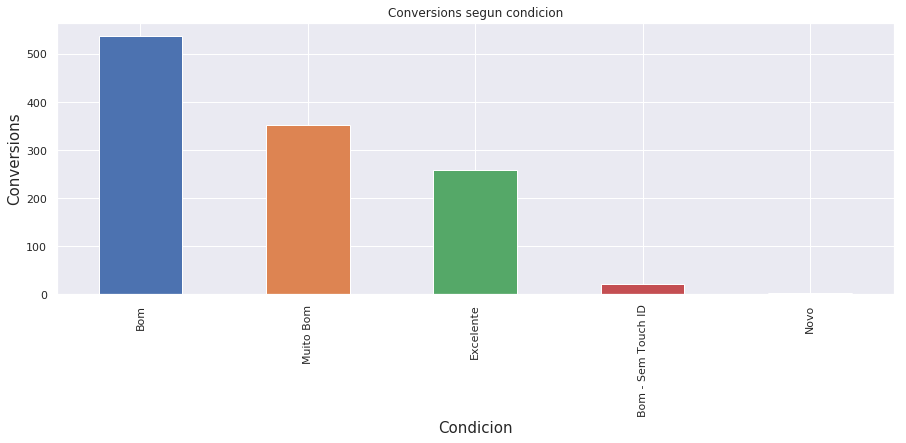

In [30]:
events.loc[events['event']=='conversion']['condition'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun condicion')
plt.ylabel("Conversions", size=15)
plt.xlabel("Condicion", size=15)
plt.show()

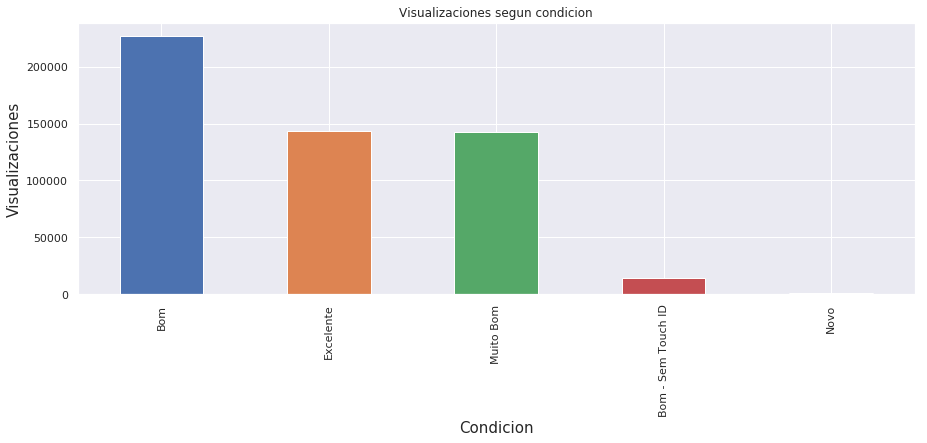

In [29]:
events.loc[events['event']=='viewed product']['condition'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun condicion')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Condicion", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Condicion

# Compras/Visualizaciones segun Modelo

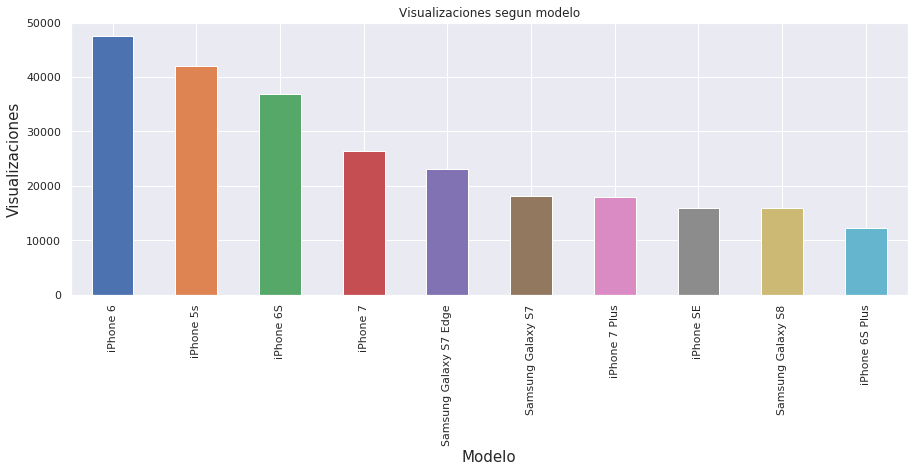

In [176]:
# Conversions segun Modelo
events.loc[events['event']=='viewed product'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun modelo')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Modelo", size=15)
plt.show()

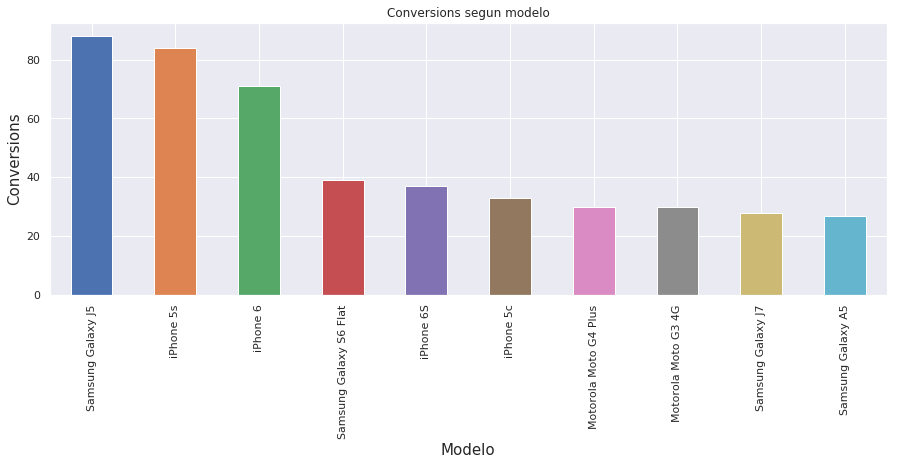

In [5]:
# Conversions segun Modelo
events.loc[events['event']=='conversion'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun modelo')
plt.ylabel("Conversions", size=15)
plt.xlabel("Modelo", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Modelo

#  Compras/Visualizaciones segun Marca

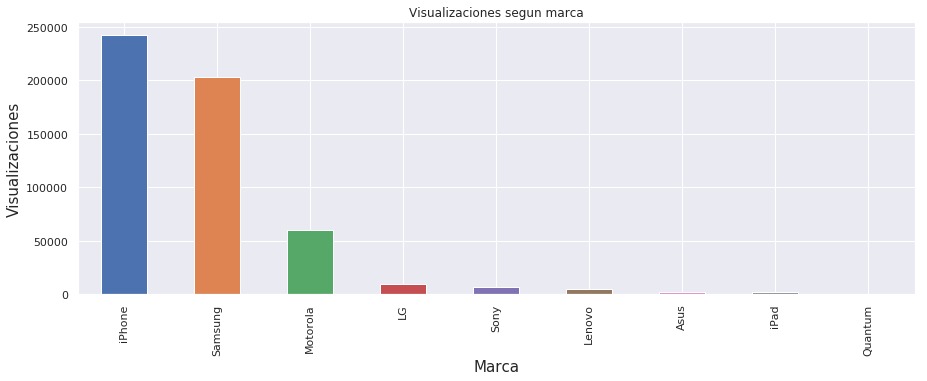

In [172]:
#Grafico Numero Eventos segun tupla Evento/Marca
events.loc[events['event']=='viewed product'].groupby('marca')['timestamp'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun marca')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Marca", size=15)
plt.show()

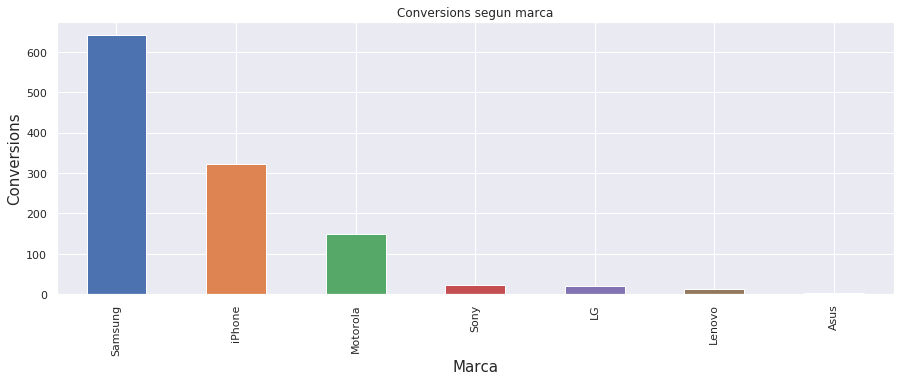

In [171]:
events.loc[events['event']=='conversion'].groupby('marca')['timestamp'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun marca')
plt.ylabel("Conversions", size=15)
plt.xlabel("Marca", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Marca

# Analisis segun region

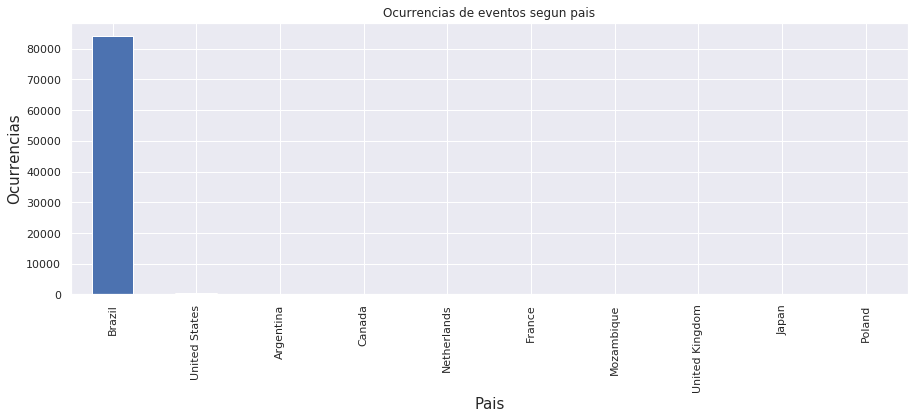

In [126]:
#Grafico eventos segun region
events.loc[~(events['country']=='Unknown')].groupby('country')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Ocurrencias de eventos segun pais')
plt.ylabel("Ocurrencias", size=15)
plt.xlabel("Pais", size=15)
plt.show()

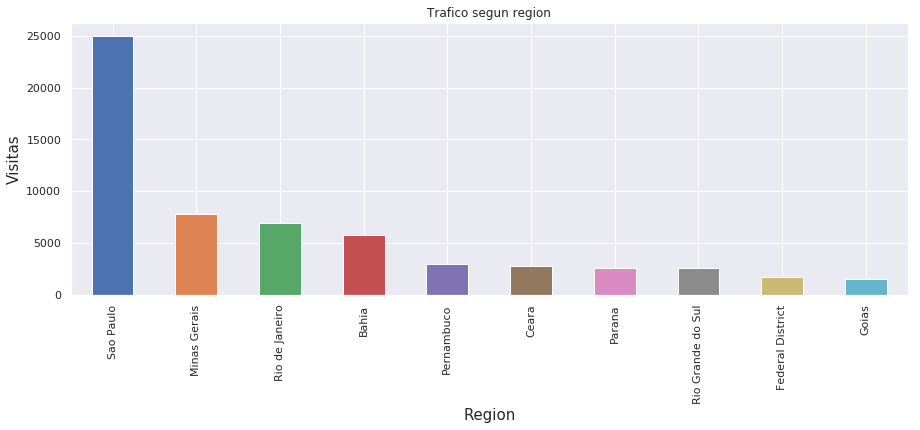

In [128]:
#Grafico eventos segun region
events.loc[~(events['region']=='Unknown')].groupby('region')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Trafico segun region')
plt.ylabel("Visitas", size=15)
plt.xlabel("Region", size=15)
plt.show()

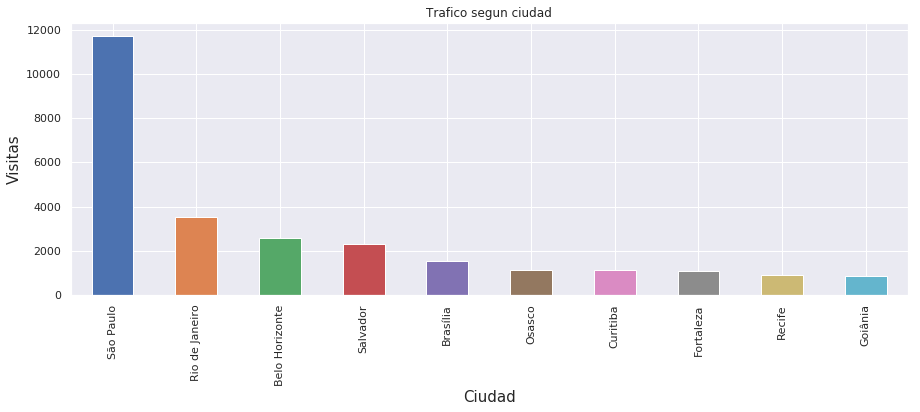

In [124]:
#Grafico eventos segun ciudad
events.loc[~(events['city']=='Unknown')].groupby('city')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Trafico segun ciudad')
plt.ylabel("Visitas", size=15)
plt.xlabel("Ciudad", size=15)
plt.show()

### Comentarios Analisis segun region

# Analisis de Campaña

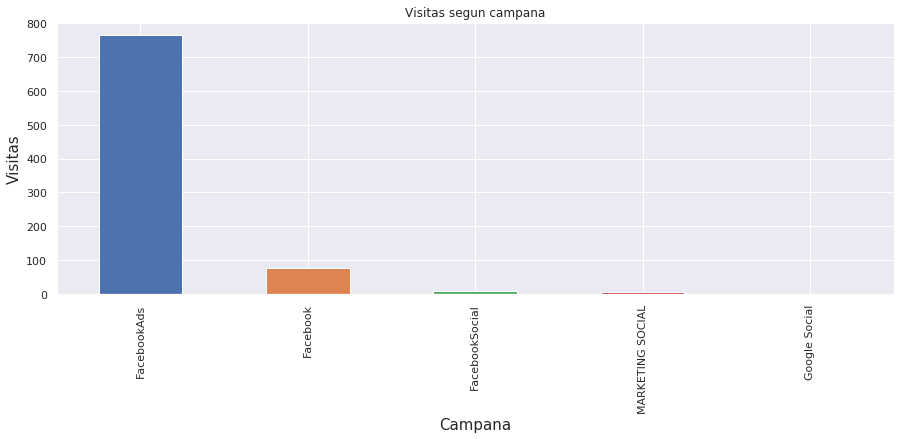

In [212]:
#grafico eventos segun campaña
events.loc[events['event']=='ad campaign hit'].groupby('campaign_source').count().head(5)['timestamp'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Visitas segun campana')
plt.ylabel("Visitas", size=15)
plt.xlabel("Campana", size=15)
plt.show()

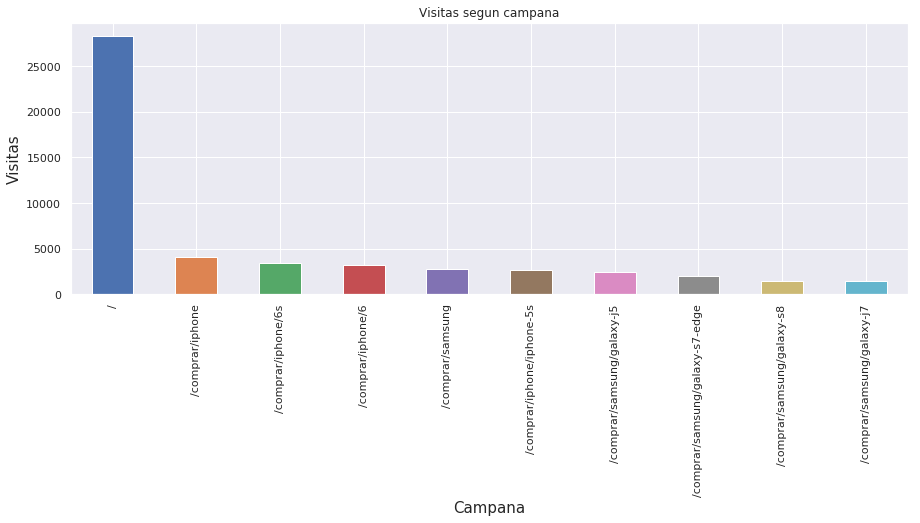

In [222]:
events.loc[events['event']=='ad campaign hit']['url'].value_counts().head(10).plot(kind='bar',figsize=(15,5))
plt.title('Visitas segun campana')
plt.ylabel("Visitas", size=15)
plt.xlabel("Campana", size=15)
plt.show()

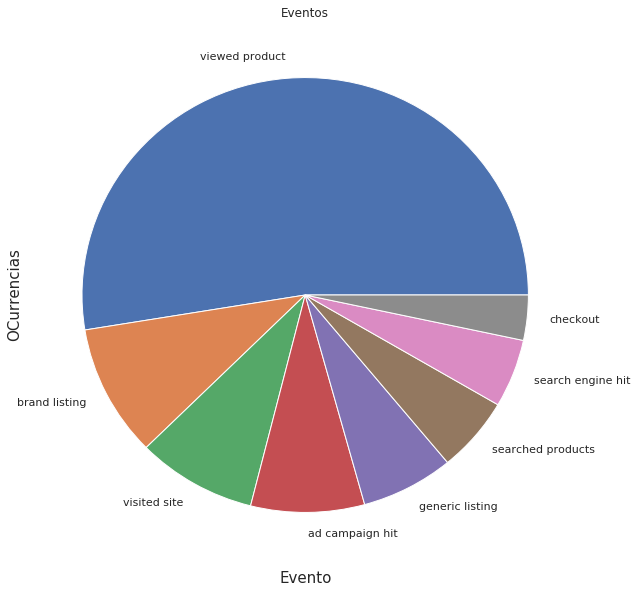

In [120]:
#Grafico segun evento
events.groupby('event')['timestamp'].count().sort_values(ascending=False).head(8).plot(kind='pie',figsize=(10,10))
plt.title('Eventos')
plt.ylabel("OCurrencias", size=15)
plt.xlabel("Evento", size=15)
plt.show()

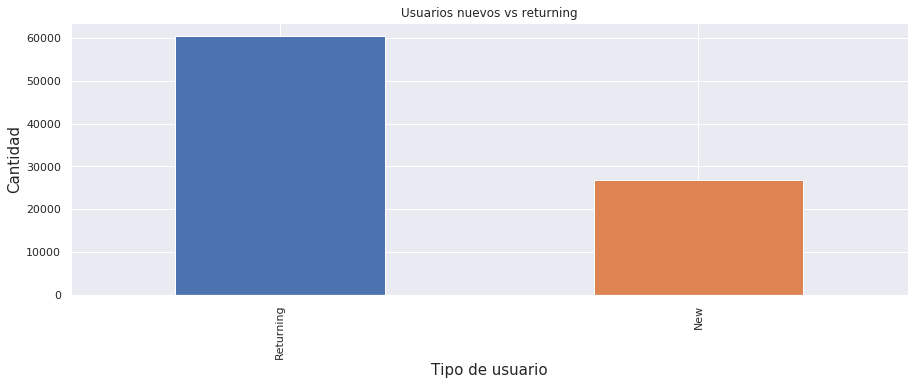

In [181]:
#Grafico new vs returnimg
events['new_vs_returning'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Usuarios nuevos vs returning')
plt.ylabel("Cantidad", size=15)
plt.xlabel("Tipo de usuario", size=15)
plt.show()

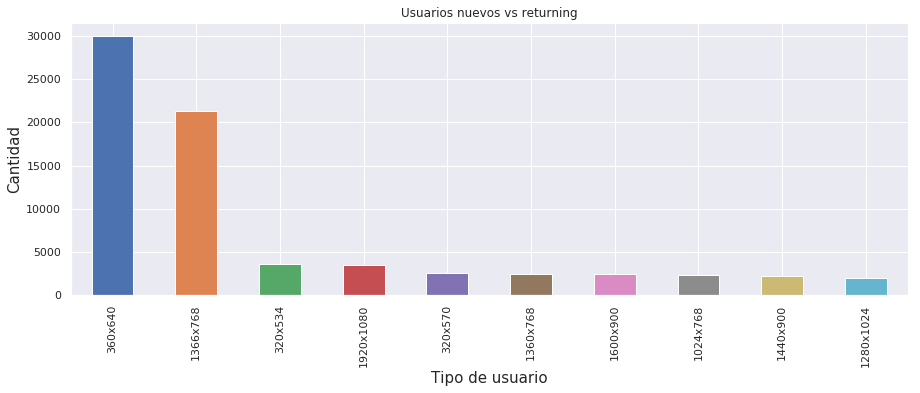

In [117]:
events.loc[events['screen_resolution'].notnull()]['screen_resolution'].value_counts().head(10).plot(kind='bar',figsize=(15,5))
plt.title('Usuarios nuevos vs returning')
plt.ylabel("Cantidad", size=15)
plt.xlabel("Tipo de usuario", size=15)
plt.show()

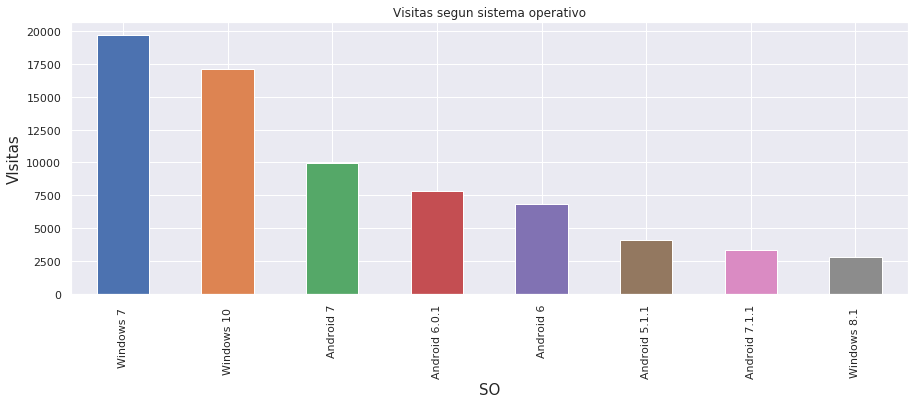

In [21]:
#Grafico visitas segun sistema operativo
events.loc[~events['operating_system_version'].str.contains('nan',case=False,regex=False)]['operating_system_version'].value_counts().head(8).sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Visitas segun sistema operativo')
plt.ylabel("Visitas", size=15)
plt.xlabel("SO", size=15)
plt.show()